In [53]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import LabelEncoder

In [54]:
dataset=pd.read_csv('car data.csv')

In [55]:
dataset.head()

,Car_Name,Year,Present_Price,Kms_Driven,Fuel_Type,Seller_Type,Transmission,Owner,Selling_Price
0,ritz,2014,5.59,27000,Petrol,Dealer,Manual,0,3.35
1,sx4,2013,9.54,43000,Diesel,Dealer,Manual,0,4.75
2,ciaz,2017,9.85,6900,Petrol,Dealer,Manual,0,7.25
3,wagon r,2011,4.15,5200,Petrol,Dealer,Manual,0,2.85
4,swift,2014,6.87,42450,Diesel,Dealer,Manual,0,4.60


In [56]:
# now checking the missing values in the dataset
dataset.isnull().sum()

Car_Name         0
Year             0
Present_Price    0
Kms_Driven       0
Fuel_Type        0
Seller_Type      0
Transmission     0
Owner            0
Selling_Price    0
dtype: int64

In [57]:
# checking the info of dataset like datatype of cols etc
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 301 entries, 0 to 300
Data columns (total 9 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Car_Name       301 non-null    object 
 1   Year           301 non-null    int64  
 2   Present_Price  301 non-null    float64
 3   Kms_Driven     301 non-null    int64  
 4   Fuel_Type      301 non-null    object 
 5   Seller_Type    301 non-null    object 
 6   Transmission   301 non-null    object 
 7   Owner          301 non-null    int64  
 8   Selling_Price  301 non-null    float64
dtypes: float64(2), int64(3), object(4)
memory usage: 21.3+ KB


In [58]:
# now we do encoding of featuered data
# now i convert car_name into numbers
car_name_le=LabelEncoder()
dataset['Car_Name']=car_name_le.fit_transform(dataset['Car_Name'])


In [59]:
# now i convert Fuel_Type into numbers
Fuel_Type_he=LabelEncoder()
dataset['Fuel_Type']=Fuel_Type_he.fit_transform(dataset['Fuel_Type'])

In [60]:
Seller_Type_he=LabelEncoder()
dataset['Seller_Type']=Seller_Type_he.fit_transform(dataset['Seller_Type'])

In [61]:
Transmission_le=LabelEncoder()
dataset['Transmission']=Transmission_le.fit_transform(dataset['Transmission'])

In [62]:
dataset.head()

,Car_Name,Year,Present_Price,Kms_Driven,Fuel_Type,Seller_Type,Transmission,Owner,Selling_Price
0,90,2014,5.59,27000,2,0,1,0,3.35
1,93,2013,9.54,43000,1,0,1,0,4.75
2,68,2017,9.85,6900,2,0,1,0,7.25
3,96,2011,4.15,5200,2,0,1,0,2.85
4,92,2014,6.87,42450,1,0,1,0,4.60


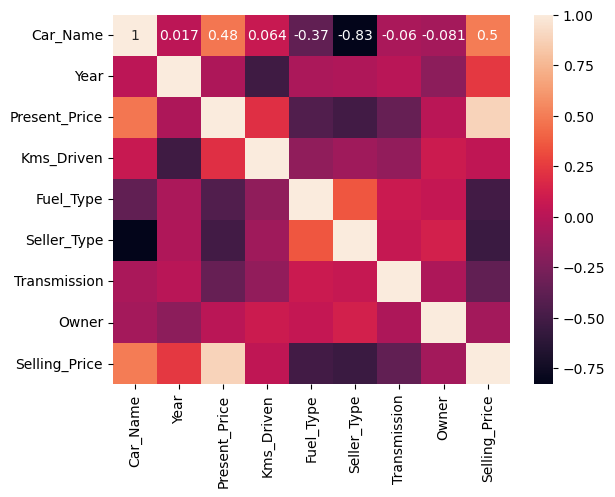

In [63]:
# we are creating a graph to check linearity between input and output (x and y)
sns.heatmap(data=dataset.corr(),annot=True)
plt.show()

In [31]:
x=dataset.iloc[:,:-1]
y=dataset['Selling_Price']

In [34]:
# now i do feaure scaling of data
from sklearn.preprocessing import StandardScaler
ss=StandardScaler()
x=pd.DataFrame(ss.fit_transform(x),columns=x.columns)

In [35]:
x

,Car_Name,Year,Present_Price,Kms_Driven,Fuel_Type,Seller_Type,Transmission,Owner
0,1.074323,0.128897,-0.236215,-0.256224,0.500183,-0.737285,0.39148,-0.174501
1,1.191828,-0.217514,0.221505,0.155911,-1.852241,-0.737285,0.39148,-0.174501
2,0.212627,1.168129,0.257427,-0.773969,0.500183,-0.737285,0.39148,-0.174501
3,1.309332,-0.910335,-0.403079,-0.817758,0.500183,-0.737285,0.39148,-0.174501
4,1.152659,0.128897,-0.087890,0.141743,-1.852241,-0.737285,0.39148,-0.174501
...,...,...,...,...,...,...,...,...
296,0.251795,0.821718,0.460214,-0.076225,-1.852241,-0.737285,0.39148,-0.174501
297,0.134290,0.475308,-0.200292,0.593804,0.500183,-0.737285,0.39148,-0.174501
298,0.251795,-1.603156,0.390687,1.313340,0.500183,-0.737285,0.39148,-0.174501
299,0.251795,1.168129,0.564504,-0.719876,-1.852241,-0.737285,0.39148,-0.174501


In [38]:
# now i convert data into train and test
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=42)

In [45]:
# i will import all models whcih can be used here and check all but in final i select to that model which gives highest accuracy
from sklearn.linear_model import LinearRegression,Lasso,Ridge,ElasticNet
from sklearn.tree import DecisionTreeRegressor
from sklearn.svm import SVR
from sklearn.neighbors import KNeighborsRegressor
from sklearn.ensemble import RandomForestRegressor

In [64]:
dt=DecisionTreeRegressor()
dt.fit(x_train,y_train)

DecisionTreeRegressor()

In [71]:
# predication of model
pred=dt.predict(x_test)
pred

array([ 0.5 , 11.5 ,  4.1 ,  0.2 ,  7.05,  6.75,  1.11,  0.4 ,  0.48,
        7.2 ,  9.25,  1.25,  7.5 ,  0.45,  4.75,  2.35,  1.25, 14.25,
        0.48,  1.75,  0.25,  8.75,  4.5 ,  2.7 ,  0.45,  2.9 ,  5.25,
        2.9 ,  1.15,  1.15,  0.25,  8.55,  0.45,  2.25,  7.75,  3.9 ,
        5.85,  5.9 ,  2.55,  5.9 ,  3.49,  3.35,  5.85,  0.6 ,  5.95,
        0.65,  8.5 ,  4.  ,  3.1 ,  3.1 ,  4.75,  1.65, 19.99, 20.75,
        6.45,  9.15,  5.25,  8.99,  3.25,  6.4 ,  0.25])

In [66]:
# now check the accuracy of trainging and testing to avoid overfitting
dt.score(x_train,y_train)*100,dt.score(x_test,y_test)*100

(100.0, 95.57440943232962)

In [74]:
# now i check error in the decision tree regressor(which model have less error and high accuracy that is best model)
from sklearn.metrics import mean_squared_error,mean_absolute_error
mean_squared_error(y_test,pred)

1.019460655737705

In [75]:
mean_absolute_error(y_test,pred)

0.6463934426229507